## Installations:

- install tesseract: https://github.com/tesseract-ocr/tessdoc/blob/main/Installation.md
- pip install pytesseract 

In [1]:
import cv2
import pytesseract
import pandas as pd
import numpy as np
from PIL import Image
import os

In [2]:
X = pd.read_csv("../raw_data/train_x.csv", delimiter=" ", index_col="Id")
y = pd.read_csv("../raw_data/train_y.csv", delimiter=" ", index_col="Id")
y_umbr = np.load("../raw_data/tmp_data/y_train_umbr.npy", encoding='bytes', allow_pickle=True)

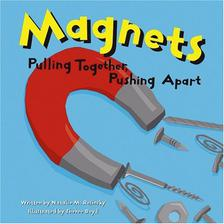

In [3]:
Image.open(os.path.join("../raw_data/Images/", X['Image_name'][1]))


### Code below does some image preprocessing to improve successful character recognition

In [6]:
# Set the path to the Tesseract executable (you find this by writing 'which tesseract' in terminal)
pytesseract.pytesseract.tesseract_cmd = r'/opt/homebrew/bin/tesseract'

# Function to preprocess the image
def preprocess_image(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply CLAHE for enhancing contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(gray)

    # Apply thresholding to separate text from background
    _, thresholded_image = cv2.threshold(enhanced_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Apply morphological operations (erosion and dilation) to remove noise
    #kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    #eroded_image = cv2.erode(thresholded_image, kernel, iterations=1)
    #dilated_image = cv2.dilate(eroded_image, kernel, iterations=1)

    return thresholded_image

empty_count = 0  # Counter for empty strings

lines_list = []  # List to store lines for each image

num_images = 500

for i in range(num_images):
    image_path = os.path.join("../raw_data/Images/", X['Image_name'][i])
    # Load the image
    image = cv2.imread(image_path)

    # Preprocess the image
    preprocessed_image = preprocess_image(image)

    # Apply Pytesseract OCR
    title = pytesseract.image_to_string(preprocessed_image)

    # Split the extracted text into lines
    lines = title.split('\n')
    
    lines_list.append(lines)
    
    # Count empty strings
    if not any(lines):
        empty_count += 1

    print(lines)

# Print the total number of empty strings
print(f"Total empty strings: {empty_count}/{num_images}")

['kk', 'Life Lessons', 'of The BEAR', '', '']
['']
['mndhey Security', '']
['']
['']
['COMO VENCER BL', '', 'INSOMNI!', '', '']
['JOHN MARTIN', 'LITTEESOHN.', '', '']
['Silberoerg', '', 'AXLSINEHO', '', '']
["Mosby's", '', '_—Mosby’s__s=*', 'ONCOLOGY ==.', 'NURSING ="', 'ADVISOR ==', 'A Comprehensive', '', 'Aro ce', '', 'i aoe', '', 'Jove Marry', '', '']
['']
['tony eB', '', 'Qe', '', 'Israel', '& the Palestinian', 'Territories', '', '']
['']
['Breads, Cakes,', 'Rolls & More', '', '']
['']
['f= WOOD SPIRITS', 'qi amd GREEN MEN', '', '']
["Sanuce VANCLEAVE's", '', '']
['MAKING SENSE', 'Tantric Buddhism', '']
['THE MAKING', 'OF GLOBAL =', '', 'THE POLITICAL ECGNOMY J', 'OF AMERICAN EMPIRE a', '«', '', '@', '', '']
['']
['']
['Band Theory and', '', 'Electronic Properties', 'of Solids', '', '']
['JOKES JOKES', 'MORE JOKES', '', 'my', 'uns and putdovms.', '']
['']
["BYRoN's", 'PoRTRY AND Prost |', '', '']
['Issues in', 'Cost Accounting for', 'Health Care', 'Organizations', '', '']
['Employm